In [1]:
from feature_selector_V3 import Feature_Selector_RL

In [2]:
test = Feature_Selector_RL(60, [], [], {}, eps=.15, nb_iter=200)

In [3]:
import pandas as pd

In [4]:
#Data processing

datContent = [i.strip().split() for i in open("sonar.all-data").readlines()]
import csv
with open("sonar.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('sonar.all-data.csv.xls', sep=',', header=None).loc[1:]
X = australian_data.drop(60, axis=1)
y = australian_data[60]

In [5]:
test.aor

In [6]:
'''#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', header=None)
X = australian_data.drop(14, axis=1)
y = australian_data[14]'''

'#Data processing\n\ndatContent = [i.strip().split() for i in open("australian_data.dat").readlines()]\nimport csv\nwith open("australian_data.csv", "w") as f:\n    writer = csv.writer(f)\n    writer.writerows(datContent)\n\naustralian_data = pd.read_csv(\'australian_data.csv\', header=None)\nX = australian_data.drop(14, axis=1)\ny = australian_data[14]'

In [7]:
results = test.fit_predict(X, y)

---------- AOR init ----------
---------- Process init ----------
---------- Data Processing ----------
---------- The process has been successfully init ----------
---------- Training ----------


  0%|          | 0/100 [00:00<?, ?it/s]

nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60


  1%|          | 1/100 [00:00<00:45,  2.17it/s]

nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60


  2%|▏         | 2/100 [00:00<00:49,  1.98it/s]

nb 12 and feat nb 60
nb 13 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


  3%|▎         | 3/100 [00:01<00:50,  1.91it/s]

nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 13 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


  4%|▍         | 4/100 [00:01<00:42,  2.23it/s]

nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


  5%|▌         | 5/100 [00:02<00:40,  2.34it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60


  6%|▌         | 6/100 [00:02<00:48,  1.96it/s]

nb 12 and feat nb 60
nb 13 and feat nb 60
nb 14 and feat nb 60
nb 15 and feat nb 60
nb 16 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60


  7%|▋         | 7/100 [00:03<00:49,  1.87it/s]

nb 12 and feat nb 60
nb 13 and feat nb 60
nb 14 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60


  8%|▊         | 8/100 [00:04<00:48,  1.90it/s]

nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60


  9%|▉         | 9/100 [00:04<00:40,  2.22it/s]

nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 10%|█         | 10/100 [00:04<00:37,  2.41it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 11%|█         | 11/100 [00:05<00:38,  2.34it/s]

nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 12%|█▏        | 12/100 [00:05<00:34,  2.52it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60


 13%|█▎        | 13/100 [00:05<00:36,  2.41it/s]

nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 14%|█▍        | 14/100 [00:06<00:38,  2.21it/s]

nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 13 and feat nb 60
nb 1 and feat nb 60


 15%|█▌        | 15/100 [00:06<00:33,  2.57it/s]

nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 16%|█▌        | 16/100 [00:07<00:34,  2.44it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 17%|█▋        | 17/100 [00:07<00:34,  2.44it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60


 18%|█▊        | 18/100 [00:07<00:34,  2.37it/s]

nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60


 19%|█▉        | 19/100 [00:08<00:34,  2.38it/s]

nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 20%|██        | 20/100 [00:08<00:31,  2.56it/s]

nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 21%|██        | 21/100 [00:08<00:26,  2.98it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60


 22%|██▏       | 22/100 [00:09<00:27,  2.79it/s]

nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 23%|██▎       | 23/100 [00:09<00:27,  2.75it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 24%|██▍       | 24/100 [00:10<00:26,  2.83it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 25%|██▌       | 25/100 [00:10<00:26,  2.80it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 26%|██▌       | 26/100 [00:10<00:29,  2.51it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 13 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 27%|██▋       | 27/100 [00:11<00:30,  2.42it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 29%|██▉       | 29/100 [00:11<00:23,  3.01it/s]

nb 10 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 30%|███       | 30/100 [00:12<00:18,  3.70it/s]

nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 32%|███▏      | 32/100 [00:12<00:16,  4.16it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60


 34%|███▍      | 34/100 [00:13<00:16,  3.95it/s]

nb 13 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60


 35%|███▌      | 35/100 [00:13<00:16,  3.98it/s]

nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60


 36%|███▌      | 36/100 [00:13<00:14,  4.41it/s]

nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 37%|███▋      | 37/100 [00:13<00:13,  4.51it/s]

nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60


 39%|███▉      | 39/100 [00:13<00:10,  5.63it/s]

nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 41%|████      | 41/100 [00:14<00:12,  4.63it/s]

nb 10 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60


 42%|████▏     | 42/100 [00:15<00:19,  2.97it/s]

nb 12 and feat nb 60
nb 13 and feat nb 60
nb 14 and feat nb 60
nb 15 and feat nb 60
nb 16 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 44%|████▍     | 44/100 [00:15<00:14,  3.81it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 45%|████▌     | 45/100 [00:15<00:13,  4.02it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60


 46%|████▌     | 46/100 [00:16<00:15,  3.45it/s]

nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 47%|████▋     | 47/100 [00:16<00:14,  3.73it/s]

nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 48%|████▊     | 48/100 [00:16<00:15,  3.35it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60


 49%|████▉     | 49/100 [00:16<00:13,  3.82it/s]

nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 50%|█████     | 50/100 [00:16<00:11,  4.26it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60


 51%|█████     | 51/100 [00:17<00:16,  2.99it/s]

nb 11 and feat nb 60
nb 12 and feat nb 60
nb 13 and feat nb 60
nb 14 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 52%|█████▏    | 52/100 [00:17<00:14,  3.36it/s]

nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 53%|█████▎    | 53/100 [00:17<00:11,  4.03it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 57%|█████▋    | 57/100 [00:18<00:05,  7.23it/s]

nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 59%|█████▉    | 59/100 [00:18<00:05,  7.96it/s]

nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60


 60%|██████    | 60/100 [00:18<00:06,  5.94it/s]

nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 61%|██████    | 61/100 [00:18<00:06,  5.94it/s]

nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60


 67%|██████▋   | 67/100 [00:19<00:03,  8.26it/s]

nb 12 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 70%|███████   | 70/100 [00:19<00:03,  9.58it/s]

nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 72%|███████▏  | 72/100 [00:20<00:03,  8.13it/s]

nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60


 73%|███████▎  | 73/100 [00:20<00:03,  7.72it/s]

nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 75%|███████▌  | 75/100 [00:20<00:04,  6.10it/s]

nb 10 and feat nb 60
nb 11 and feat nb 60
nb 12 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60


 78%|███████▊  | 78/100 [00:20<00:02,  7.51it/s]

nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60


 79%|███████▉  | 79/100 [00:21<00:03,  6.13it/s]

nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60


 81%|████████  | 81/100 [00:21<00:03,  6.09it/s]

nb 8 and feat nb 60
nb 9 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 82%|████████▏ | 82/100 [00:21<00:03,  5.82it/s]

nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60


 83%|████████▎ | 83/100 [00:22<00:03,  5.07it/s]

nb 9 and feat nb 60
nb 10 and feat nb 60
nb 11 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


 84%|████████▍ | 84/100 [00:22<00:02,  5.52it/s]

nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 85%|████████▌ | 85/100 [00:22<00:02,  5.07it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 86%|████████▌ | 86/100 [00:22<00:02,  4.76it/s]

nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 9 and feat nb 60


 88%|████████▊ | 88/100 [00:23<00:02,  5.24it/s]

nb 10 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 7 and feat nb 60
nb 8 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60


 90%|█████████ | 90/100 [00:23<00:01,  6.18it/s]

nb 7 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60


100%|██████████| 100/100 [00:23<00:00,  4.24it/s]

nb 6 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 5 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
nb 1 and feat nb 60
nb 2 and feat nb 60
nb 3 and feat nb 60
nb 4 and feat nb 60
---------- Results ----------


In [8]:
results

([(0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59),
  array([ 9., 10.,  7.,  5., 12.,  5.,  4., 11., 11.,  6., 10., 12., 67.,
         10.,  8., 11., 11.,  9., 19., 11., 81.,  8.,  9., 12.,  7.,  9.,
         51., 10., 10.,  6.,  4.,  7., 10.,  7.,  9., 14., 23., 13., 10.,
         15., 11.,  1., 11.,  3., 23., 24., 13., 48.,  7.,  6.,  9., 11.,
          6.,  8., 11., 13., 10.,  8., 12., 11.]),
  (-0.007824173784856616,
   1.0408340855860842e-18,
   -0.03238482617632117,
   -0.0622324097101248,
   -0.006791844658661369,
   -0.011478260869565202,
   -0.0035869565217391186,
   0.006561001355743032,
   0.014321487325565213,
   0.000529

In [10]:
test.feature_structure

{0: [State(number=[0, 0], description=[], v_value=0.11539116324839077, reward=0.75, nb_visited=0)],
 1: [State(number=[1, 0], description=[29], v_value=-0.0717391304347826, reward=0.6231884057971014, nb_visited=1),
  State(number=[1, 1], description=[55], v_value=0.02869565217391306, reward=0.5652173913043478, nb_visited=1),
  State(number=[1, 4], description=[9], v_value=0.0, reward=0.6956521739130435, nb_visited=1),
  State(number=[1, 6], description=[32], v_value=0.02869565217391306, reward=0.5797101449275363, nb_visited=1),
  State(number=[1, 7], description=[57], v_value=0.014347826086956476, reward=0.5797101449275363, nb_visited=1),
  State(number=[1, 8], description=[14], v_value=-0.0717391304347826, reward=0.6376811594202898, nb_visited=1),
  State(number=[1, 5], description=[50], v_value=0.057965217391304384, reward=0.6376811594202898, nb_visited=2),
  State(number=[1, 9], description=[21], v_value=0.10043478260869566, reward=0.5217391304347826, nb_visited=1),
  State(number=[

---------- Data Processing ----------
---------- Score ----------
Set of variables : Benchmark : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] and RL : [55 42 14  6 54  2 34 24 13 43 40 39 58 41 36 56  1 37 49 52 11  3 47 15
 31 57  0 30 48 26  8  5 12 53 35 33 28 18 10 59  7 16 21 45 38 23 32  4
 27 50 17 29 22 20 19 51 44  9 46]
Benchmark accuracy : 0.7971014492753623, RL accuracy : 0.782608695652174 with 59 variables [0]
Set of variables : Benchmark : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59] and RL : [42 14  6 54  2 34 24 13 43 40 39 58 41 36 56  1 37 49 52 11  3 47 15 31
 57  0 30 48 26  8  5 12 53 35 33 28 18 10 59  7 16 21

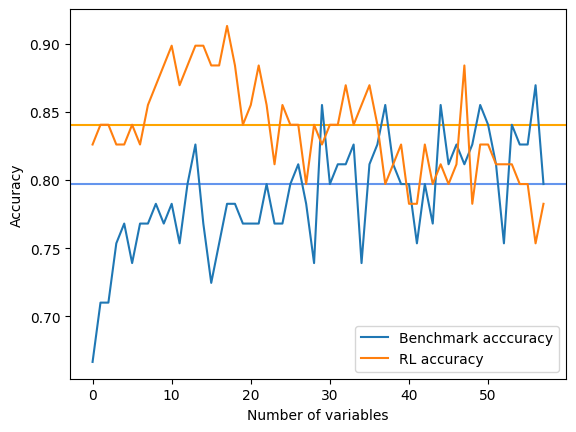

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
test.compare_with_benchmark(X, y, results[0])

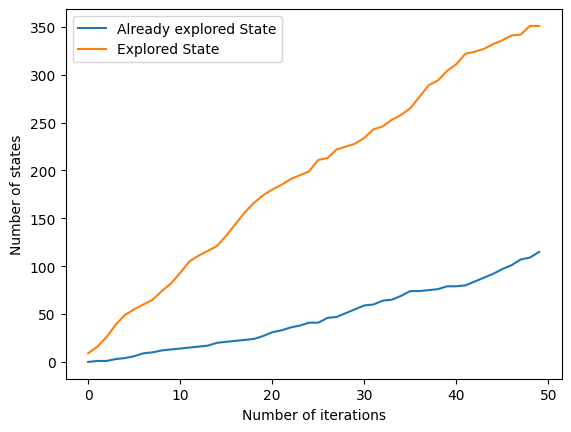

In [9]:
test.get_plot_ratio_exploration()

In [18]:
test.get_best_state()

([State(number=[7, 29], description=[7, 3, 8, 4, 6, 11, 1], v_value=-0.02171052631578943, reward=0.8947368421052632, nb_visited=1),
  0.8947368421052632],
 [State(number=[1, 8], description=[3], v_value=0.3428778104887635, reward=0.5175438596491229, nb_visited=2),
  0.3428778104887635])

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
#From RL
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train[[7, 3, 8, 4, 6, 11, 1]], y_train)
accuracy: float = clf.score(X_test[[7, 3, 8, 4, 6, 11, 1]], y_test)
print(accuracy)

#Benchmark
estimator = RandomForestClassifier(max_depth=4)
selector = RFE(estimator, n_features_to_select=7, step=1)
selector = selector.fit(X_train, y_train)
sele_acc = selector.score(X_test, y_test)
print(sele_acc)

0.8728070175438597
0.8640350877192983
